In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

sys.path.insert(0, '../')

from global_config import config
from utils.plot_utils import *

from statsmodels.nonparametric.smoothers_lowess import lowess

data_dir     = config.get_property('covid_fb2')
dict_correct = {'Los Martires': 'Los Mártires', 'Fontibon': 'Fontibón', 'Engativa': 'Engativá',
                            'San Cristobal': 'San Cristóbal', 'Usaquen': 'Usaquén',
                            'Ciudad Bolivar': 'Ciudad Bolívar', 'Candelaria': 'La Candelaria'}
palette_guide = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
palette_grays = ["#231D1F", "#939597"]

In [ ]:
data_cases_path = os.path.join(data_dir, 'agglomerated', 'geometry')
cases_df        = pd.read_csv(os.path.join(data_cases_path, 'cases.csv'), parse_dates=["date_time"])

In [3]:

dict_correct    = {'Los Martires': 'Los Mártires', 'Fontibon': 'Fontibón', 'Engativa': 'Engativá',
                            'San Cristobal': 'San Cristóbal', 'Usaquen': 'Usaquén',
                            'Ciudad Bolivar': 'Ciudad Bolívar', 'Candelaria': 'La Candelaria'}

cases_df["poly_id"]   = cases_df["poly_id"].apply(lambda s:   s.replace("colombia_bogota_localidad_",""))
cases_df["poly_name"] = cases_df["poly_id"].apply(lambda s:   ' '.join( [word.capitalize() for word in s.replace("colombia_bogota_localidad_","").split('_') ] ) )
cases_df["poly_name"] = cases_df["poly_name"].replace( dict_correct )
cases_df              = cases_df.rename(columns={'poly_id': 'locality_id', 'poly_name': 'locality'})
cases_bog_df          = cases_df.groupby(['locality_id', 'location', 'date_time']).sum()[["num_cases", "num_diseased", "num_infected_in_icu"]]
cases_bog_df          = cases_bog_df.unstack([0,1]).resample('1D').sum().stack().stack().reset_index().rename(columns={'date_time':'date','num_cases': 'confirm',
                                                                                                                'num_diseased': 'deaths',
                                                                                                                'num_infected_in_icu': 'icu'})
cases_bog_df = cases_bog_df.rename(columns={'confirm': 'cases'})
cases_bog_df

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_84708/644776559.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  cases_bog_df          = cases_bog_df.unstack([0,1]).resample('1D').sum().stack().stack().reset_index().rename(columns={'date_time':'date','num_cases': 'confirm',
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_84708/644776559.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  cases_bog_df          = cases_bog_df.unstack([0,1]).resample('1D').sum().stack().stack().reset_index().rename(columns={'date_time':'date','num_cases': 'confir

,date,location,locality_id,cases,deaths,icu
0,2020-02-26,20 DE JULIO,san_cristobal,0.0,0.0,0.0
1,2020-02-26,AEROPUERTO EL DORADO,fontibon,0.0,0.0,0.0
2,2020-02-26,ALAMOS,engativa,0.0,0.0,0.0
3,2020-02-26,ALFONSO LOPEZ,usme,0.0,0.0,0.0
4,2020-02-26,AMERICAS,kennedy,0.0,0.0,0.0
...,...,...,...,...,...,...
54629,2021-06-02,USAQUEN,usaquen,0.0,0.0,0.0
54630,2021-06-02,VENECIA,tunjuelito,0.0,0.0,0.0
54631,2021-06-02,VERBENAL,usaquen,0.0,0.0,0.0
54632,2021-06-02,ZONA FRANCA,fontibon,0.0,0.0,0.0


In [4]:
dict_correct = {'Los Martires': 'Los Mártires', 'Fontibon': 'Fontibón', 'Engativa': 'Engativá',
                        'San Cristobal': 'San Cristóbal', 'Usaquen': 'Usaquén',
                        'Ciudad Bolivar': 'Ciudad Bolívar', 'Candelaria': 'La Candelaria'}

def correct_locality(loc):
    if loc in list(dict_correct.keys()):
        return dict_correct[loc]
    return loc

localities = [" ".join( [l.capitalize() for l in loc.split("_")]) for loc in cases_bog_df.locality_id.unique()]
localities = [correct_locality(l) for l in localities]

dates_prelockdown = pd.date_range(start = pd.to_datetime("12-07-2020", dayfirst=True) - pd.Timedelta(days=30),
                                  end  = pd.to_datetime("12-07-2020", dayfirst=True), freq='D')

# Del 13 al 26 de julio
dates_lockdown01 = pd.date_range(start = pd.to_datetime("13-07-2020", dayfirst=True),
                                end    = pd.to_datetime("26-07-2020", dayfirst=True), freq='D')
# Del 23 de julio al 6 de agosto
dates_lockdown02 = pd.date_range(start = pd.to_datetime("23-07-2020", dayfirst=True),
                                end    = pd.to_datetime("06-08-2020", dayfirst=True), freq='D')
# Del 31 de julio y al 14 de agosto
dates_lockdown03 = pd.date_range(start = pd.to_datetime("31-07-2020", dayfirst=True),
                                end    = pd.to_datetime("14-08-2020", dayfirst=True), freq='D')
# Del 16 al 30 de agosto
dates_lockdown04 = pd.date_range(start = pd.to_datetime("16-08-2020", dayfirst=True),
                                end    = pd.to_datetime("30-08-2020", dayfirst=True), freq='D')

# 'San Cristóbal', 'Fontibón', 'Engativá', 'Usme', 'Kennedy', 'Bosa', 'Ciudad Bolívar', 'Suba',
#     'Chapinero', 'Antonio Narino', 'Puente Aranda', 'Teusaquillo', 'Usaquén',
#     'Rafael Uribe Uribe', 'Barrios Unidos', 'La Candelaria', 'Santa Fe', 'Los Mártires', 'Tunjuelito'

# Ciudad Bolívar, San Cristóbal, Rafael Uribe Uribe, Chapinero, Santa Fe, Usme, Los Mártires y Tunjuelito
locs_01 = ["Ciudad Bolívar", "San Cristóbal", "Rafael Uribe Uribe", "Chapinero",
                                "Santa Fe", "Usme", "Los Mártires", "Tunjuelito"]
# Bosa, Antonio Nariño, Kennedy, Puente Aranda y Fontibón
locs_02 = ["Bosa", "Antonio Nariño", "Kennedy", "Puente Aranda", "Fontibón"]
# Suba, Engativá y Barrios Unidos.
locs_03 = ["Suba", "Engativá", "Barrios Unidos"]
# Usaquén, Chapinero, Santa Fe, La Candelaria, Teusaquillo, Puente Aranda y Antonio Nariño.
locs_04 = ["Usaquén", "Chapinero", "Santa Fe", "La Candelaria",
                    "Teusaquillo", "Puente Aranda", "Antonio Nariño"]


In [5]:
from global_config import config

results_dir = config.get_property('results2_dir')

movement_df                  = pd.read_csv(os.path.join(results_dir, 'data', 'movement_fb_locality','movement.csv'), parse_dates = ['date_time'])
movement_df["start_poly_id"] = movement_df.start_poly_id.apply(lambda s: ' '.join( [word.capitalize() for word in s.replace("colombia_bogota_localidad_","").split('_') ] ) )
movement_df["end_poly_id"]   = movement_df.end_poly_id.apply(lambda s:   ' '.join( [word.capitalize() for word in s.replace("colombia_bogota_localidad_","").split('_') ] ) )
movement_df                  = movement_df.replace( dict_correct )
movement_df

int_mov_df        = movement_df[movement_df.start_poly_id==movement_df.end_poly_id]
ext_mov_df        = movement_df[movement_df.start_poly_id!=movement_df.end_poly_id]


cases_bog_df["locality"] = cases_bog_df["locality_id"].apply(lambda loc: correct_locality(" ".join( [l.capitalize() for l in loc.split("_")])))


In [6]:
movement_df

,date_time,start_poly_id,end_poly_id,movement
0,2020-04-12,Barrios Unidos,Barrios Unidos,28117
1,2020-04-12,Barrios Unidos,Bosa,144
2,2020-04-12,Barrios Unidos,Chapinero,133
3,2020-04-12,Barrios Unidos,Ciudad Bolívar,47
4,2020-04-12,Barrios Unidos,Engativá,488
...,...,...,...,...
68225,2020-12-22,Usme,Santa Fe,451
68226,2020-12-22,Usme,Suba,15
68227,2020-12-22,Usme,Teusaquillo,77
68228,2020-12-22,Usme,Tunjuelito,170


In [7]:
dates_prelockdown = pd.date_range(start = pd.to_datetime("12-07-2020", dayfirst=True) - pd.Timedelta(days=30),
                                  end  = pd.to_datetime("12-07-2020", dayfirst=True), freq='D')
# Del 13 al 26 de julio
dates_lockdown01 = pd.date_range(start = pd.to_datetime("13-07-2020", dayfirst=True),
                                end    = pd.to_datetime("26-07-2020", dayfirst=True), freq='D')
# Del 23 de julio al 6 de agosto
dates_lockdown02 = pd.date_range(start = pd.to_datetime("23-07-2020", dayfirst=True),
                                end    = pd.to_datetime("06-08-2020", dayfirst=True), freq='D')
# Del 31 de julio y al 14 de agosto
dates_lockdown03 = pd.date_range(start = pd.to_datetime("31-07-2020", dayfirst=True),
                                end    = pd.to_datetime("14-08-2020", dayfirst=True), freq='D')
# Del 16 al 30 de agosto
dates_lockdown04 = pd.date_range(start = pd.to_datetime("16-08-2020", dayfirst=True),
                                end    = pd.to_datetime("30-08-2020", dayfirst=True), freq='D')
dates_lockdown   = [dates_lockdown01, dates_lockdown02, dates_lockdown03, dates_lockdown04]


Lockdown group 0, t-stat: -2.190, p-val: 0.038, df: 25.629
Lockdown group 1, t-stat: -3.053, p-val: 0.006, df: 21.773
Lockdown group 2, t-stat: -3.124, p-val: 0.004, df: 27.438
Lockdown group 3, t-stat: -1.130, p-val: 0.269, df: 25.819


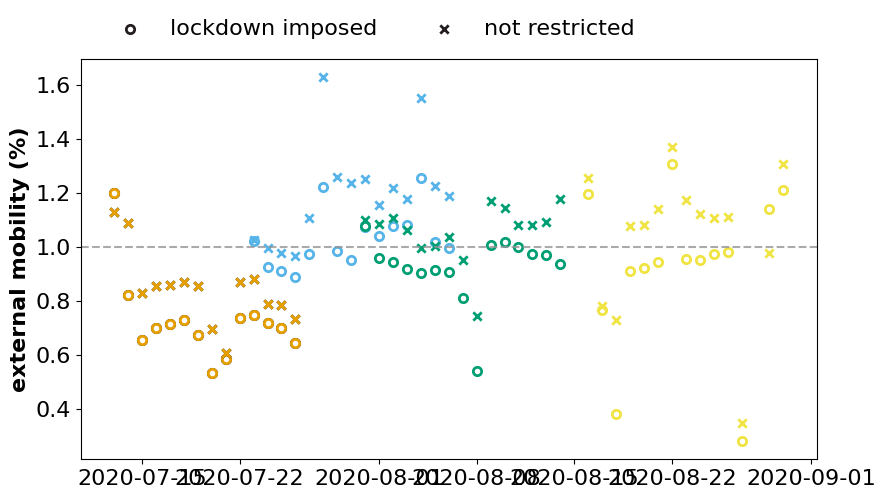

In [8]:
from scipy import stats

external_mov_locked_down_df     = []
external_mov_not_locked_down_df = []

fig, ax = plt.subplots(1, 1, figsize=(9.5, 5.2), sharex=True, sharey=False)

for i_lck, lockdown in enumerate([locs_01, locs_02, locs_03, locs_04]):
    localities_left = list(set(cases_bog_df.locality.unique()) - set(lockdown))
    if i_lck > 0:
        prev_dates = dates_lockdown[i_lck-1]
    else:
        prev_dates =  dates_lockdown[i_lck] - pd.Timedelta(days=14) #dates_lockdown[i_lck-1]


    ext_mov_gr01_df     = ext_mov_df[ext_mov_df["start_poly_id"].isin(lockdown)]
    ext_mov_not_gr01_df = ext_mov_df[ext_mov_df["start_poly_id"].isin(localities_left)]

    # - #
    ext_g01_df                = ext_mov_gr01_df[["date_time", "movement", "start_poly_id", "end_poly_id"]].groupby(['date_time', "start_poly_id", "end_poly_id"]).mean().reset_index()
    ext_g01_df                = ext_g01_df[ext_g01_df["date_time"].isin(dates_lockdown[i_lck])]
    ext_g01_df["day_of_week"] = ext_g01_df["date_time"].apply(lambda x: x.weekday())
    # - #

    ext_prev_g01_df                = ext_mov_gr01_df[["date_time", "movement", "start_poly_id", "end_poly_id"]].groupby(['date_time', "start_poly_id", "end_poly_id"]).mean().reset_index()
    ext_prev_g01_df                = ext_prev_g01_df[ext_prev_g01_df["date_time"].isin(prev_dates)]
    ext_prev_g01_df["day_of_week"] = ext_prev_g01_df["date_time"].apply(lambda x: x.weekday())
    ext_prev_g01_df                = ext_prev_g01_df.groupby(['start_poly_id', 'end_poly_id', 'day_of_week']).mean().reset_index()

    ext_g01_df                           = pd.merge(ext_g01_df, ext_prev_g01_df[["start_poly_id", "end_poly_id", "day_of_week", "movement"]], on=["start_poly_id", "end_poly_id", "day_of_week"], how="outer")
    ext_g01_df["change_in_ext_movement"] = ext_g01_df["movement_x"] / ext_g01_df["movement_y"]

    ext_g01_mean_df = ext_g01_df[["date_time", "change_in_ext_movement"]].groupby(['date_time']).mean().reset_index()
    pairs_locked_df = ext_g01_df.copy().sort_values("date_time")

    #external_mov_locked_down_df = external_mov_locked_down_df + [ext_g01_mean_df]

    ext_g01_df['pair']     = ext_g01_df.apply(lambda x: x.start_poly_id+"-"+x.end_poly_id, axis=1)
    mean_ext_df            = ext_g01_df.pivot(index="date_time", columns="pair", values="change_in_ext_movement").T.mean()
    quantiles_df           = ext_g01_df.pivot(index="date_time", columns="pair", values="change_in_ext_movement").quantile([0.05, 0.95], axis=1).T
    quantiles_df["mean"]   = mean_ext_df
    quantiles_df["median"] = ext_g01_df.pivot(index="date_time", columns="pair", values="change_in_ext_movement").T.median()
    quantiles_df = quantiles_df.dropna()

    external_mov_locked_down_df = external_mov_locked_down_df + [quantiles_df]
    locked_down_arr     = quantiles_df["mean"].values

    label = None
    if i_lck == 0:
        label = "lockdown imposed"
        ax.scatter(quantiles_df.index.values, quantiles_df["mean"], label=label, ec=palette_grays[0], fc="w", lw=2, alpha=1)
    ax.scatter(quantiles_df.index.values, quantiles_df["mean"], ec=palette_guide[i_lck], fc="w", lw=2, alpha=1)


    # - # - # HERE FOR THE LOCALITIES NOT QUARANTINED # - # - #

    ext_g01_df                = ext_mov_not_gr01_df[["date_time", "movement", "start_poly_id", "end_poly_id"]].groupby(['date_time', "start_poly_id", "end_poly_id"]).mean().reset_index()
    ext_g01_df                = ext_g01_df[ext_g01_df["date_time"].isin(dates_lockdown[i_lck])]
    ext_g01_df["day_of_week"] = ext_g01_df["date_time"].apply(lambda x: x.weekday())

    ext_prev_g01_df                = ext_mov_not_gr01_df[["date_time", "movement", "start_poly_id", "end_poly_id"]].groupby(['date_time', "start_poly_id", "end_poly_id"]).mean().reset_index()
    ext_prev_g01_df                = ext_prev_g01_df[ext_prev_g01_df["date_time"].isin(prev_dates)]
    ext_prev_g01_df["day_of_week"] = ext_prev_g01_df["date_time"].apply(lambda x: x.weekday())
    ext_prev_g01_df                = ext_prev_g01_df.groupby(['start_poly_id', 'end_poly_id', 'day_of_week']).mean().reset_index()

    ext_g01_df                           = pd.merge(ext_g01_df, ext_prev_g01_df[["start_poly_id", "end_poly_id", "day_of_week", "movement"]], on=["start_poly_id", "end_poly_id", "day_of_week"], how="outer")
    ext_g01_df["change_in_ext_movement"] = ext_g01_df["movement_x"] / ext_g01_df["movement_y"]

    ext_g01_mean_df     = ext_g01_df[["date_time", "change_in_ext_movement"]].groupby(['date_time']).mean().reset_index()
    pairs_not_locked_df = ext_g01_df.copy().sort_values("date_time")

    #external_mov_not_locked_down_df = external_mov_not_locked_down_df + [ext_g01_mean_df]

    ext_g01_df['pair']     = ext_g01_df.apply(lambda x: x.start_poly_id+"-"+x.end_poly_id, axis=1)
    mean_ext_df            = ext_g01_df.pivot(index="date_time", columns="pair", values="change_in_ext_movement").T.mean()
    quantiles_df           = ext_g01_df.pivot(index="date_time", columns="pair", values="change_in_ext_movement").quantile([0.05, 0.95], axis=1).T
    quantiles_df["mean"]   = mean_ext_df
    quantiles_df["median"] = ext_g01_df.pivot(index="date_time", columns="pair", values="change_in_ext_movement").T.median()
    quantiles_df           = quantiles_df.dropna()

    external_mov_not_locked_down_df = external_mov_not_locked_down_df + [quantiles_df]
    not_locked_down_arr = quantiles_df["mean"].values

    label = None
    if i_lck == 0:
        label = "not restricted"
        ax.scatter(quantiles_df.index.values, quantiles_df["mean"], c=palette_grays[0], lw=2, marker="x", label=label)
    ax.scatter(quantiles_df.index.values, quantiles_df["mean"], c=palette_guide[i_lck], lw=2, marker="x")

    t_stat = stats.ttest_ind(locked_down_arr, not_locked_down_arr, equal_var=False)
    print("Lockdown group {}, t-stat: {:0.3f}, p-val: {:0.3f}, df: {:0.3f}".format(i_lck, t_stat.statistic, t_stat.pvalue, t_stat.df))

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 1.15), frameon=False, ncol=2)
ax.axhline(y=1, color=palette_grays[1], ls="--", lw=1.5, alpha=0.8)
ax.set_ylabel("external mobility (%)", weight="bold")

external_mov_locked_down_df     = pd.concat(external_mov_locked_down_df)
external_mov_not_locked_down_df = pd.concat(external_mov_not_locked_down_df)

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_84708/3170037156.py:76: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = stats.levene(locked_down_arr, not_locked_down_arr)
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_84708/3170037156.py:83: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat     = stats.ttest_ind(np.sort(locked_down_arr), np.sort(not_locked_down_arr), equal_var=equal_var, trim=0.05)


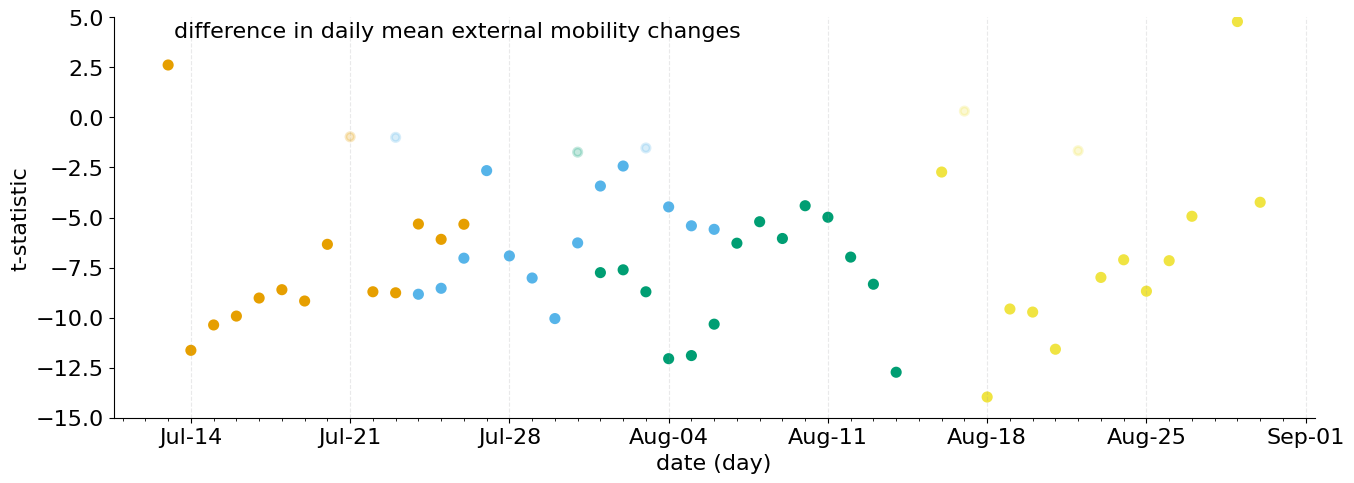

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.2), sharex=True, sharey=False)

for i_lck, lockdown in enumerate([locs_01, locs_02, locs_03, locs_04]):
    localities_left = list(set(cases_bog_df.locality.unique()) - set(lockdown))
    if i_lck > 0:
        prev_dates = dates_lockdown[i_lck-1]
    else:
        prev_dates =  dates_lockdown[i_lck] - pd.Timedelta(days=14) #dates_lockdown[i_lck-1]

    ext_mov_gr01_df     = ext_mov_df[ext_mov_df["start_poly_id"].isin(lockdown)]
    ext_mov_not_gr01_df = ext_mov_df[ext_mov_df["start_poly_id"].isin(localities_left)]

    # - #
    ext_g01_df                = ext_mov_gr01_df[["date_time", "movement", "start_poly_id", "end_poly_id"]].groupby(['date_time', "start_poly_id", "end_poly_id"]).mean().reset_index()
    ext_g01_df                = ext_g01_df[ext_g01_df["date_time"].isin(dates_lockdown[i_lck])]
    ext_g01_df["day_of_week"] = ext_g01_df["date_time"].apply(lambda x: x.weekday())
    # - #

    ext_prev_g01_df                = ext_mov_gr01_df[["date_time", "movement", "start_poly_id", "end_poly_id"]].groupby(['date_time', "start_poly_id", "end_poly_id"]).mean().reset_index()
    ext_prev_g01_df                = ext_prev_g01_df[ext_prev_g01_df["date_time"].isin(prev_dates)]
    ext_prev_g01_df["day_of_week"] = ext_prev_g01_df["date_time"].apply(lambda x: x.weekday())
    ext_prev_g01_df                = ext_prev_g01_df.groupby(['start_poly_id', 'end_poly_id', 'day_of_week']).mean().reset_index()

    ext_g01_df                           = pd.merge(ext_g01_df, ext_prev_g01_df[["start_poly_id", "end_poly_id", "day_of_week", "movement"]], on=["start_poly_id", "end_poly_id", "day_of_week"], how="outer")
    ext_g01_df["change_in_ext_movement"] = ext_g01_df["movement_x"] / ext_g01_df["movement_y"]

    ext_g01_mean_df = ext_g01_df[["date_time", "change_in_ext_movement"]].groupby(['date_time']).mean().reset_index()
    pairs_locked_df = ext_g01_df.copy().sort_values("date_time")


    ext_g01_df['pair']     = ext_g01_df.apply(lambda x: x.start_poly_id+"-"+x.end_poly_id, axis=1)
    mean_ext_df            = ext_g01_df.pivot(index="date_time", columns="pair", values="change_in_ext_movement").T.mean()
    quantiles_df           = ext_g01_df.pivot(index="date_time", columns="pair", values="change_in_ext_movement").quantile([0.05, 0.95], axis=1).T
    quantiles_df["mean"]   = mean_ext_df
    quantiles_df["median"] = ext_g01_df.pivot(index="date_time", columns="pair", values="change_in_ext_movement").T.median()
    quantiles_df = quantiles_df.dropna()

    locked_down_arr     = quantiles_df["mean"].values


    # - # - # HERE FOR THE LOCALITIES NOT QUARANTINED # - # - #

    ext_g01_df                = ext_mov_not_gr01_df[["date_time", "movement", "start_poly_id", "end_poly_id"]].groupby(['date_time', "start_poly_id", "end_poly_id"]).mean().reset_index()
    ext_g01_df                = ext_g01_df[ext_g01_df["date_time"].isin(dates_lockdown[i_lck])]
    ext_g01_df["day_of_week"] = ext_g01_df["date_time"].apply(lambda x: x.weekday())

    ext_prev_g01_df                = ext_mov_not_gr01_df[["date_time", "movement", "start_poly_id", "end_poly_id"]].groupby(['date_time', "start_poly_id", "end_poly_id"]).mean().reset_index()
    ext_prev_g01_df                = ext_prev_g01_df[ext_prev_g01_df["date_time"].isin(prev_dates)]
    ext_prev_g01_df["day_of_week"] = ext_prev_g01_df["date_time"].apply(lambda x: x.weekday())
    ext_prev_g01_df                = ext_prev_g01_df.groupby(['start_poly_id', 'end_poly_id', 'day_of_week']).mean().reset_index()

    ext_g01_df                           = pd.merge(ext_g01_df, ext_prev_g01_df[["start_poly_id", "end_poly_id", "day_of_week", "movement"]], on=["start_poly_id", "end_poly_id", "day_of_week"], how="outer")
    ext_g01_df["change_in_ext_movement"] = ext_g01_df["movement_x"] / ext_g01_df["movement_y"]

    ext_g01_mean_df     = ext_g01_df[["date_time", "change_in_ext_movement"]].groupby(['date_time']).mean().reset_index()
    pairs_not_locked_df = ext_g01_df.copy().sort_values("date_time")

    #####

    pairs_locked_df     = pairs_locked_df.reset_index(drop=True)
    pairs_not_locked_df = pairs_not_locked_df.reset_index(drop=True)

    t_stat_arr = []
    p_val_arr  = []
    for date_i in pairs_locked_df["date_time"].unique():

        mov_date_i_locked_df = pairs_locked_df[pairs_locked_df.date_time==date_i].copy()
        mov_date_i_locked_df = mov_date_i_locked_df.groupby(["start_poly_id", "end_poly_id"]).mean().reset_index()

        mov_date_i_not_locked_df = pairs_not_locked_df[pairs_not_locked_df.date_time==date_i].copy()
        mov_date_i_not_locked_df = mov_date_i_not_locked_df.groupby(["start_poly_id", "end_poly_id"]).mean().reset_index()

        locked_down_arr     = mov_date_i_locked_df["change_in_ext_movement"].dropna().values
        not_locked_down_arr = mov_date_i_not_locked_df["change_in_ext_movement"].dropna().values

        stat, p = stats.levene(locked_down_arr, not_locked_down_arr)
        #print(f"Levene test for equal variances: stat={stat}, p={p}")
        if p <= 0.05:
            equal_var = False
        else:
            equal_var = True

        t_stat     = stats.ttest_ind(np.sort(locked_down_arr), np.sort(not_locked_down_arr), equal_var=equal_var, trim=0.05)
        t_stat_arr.append(t_stat.statistic)
        p_val_arr.append(t_stat.pvalue)

    p_val_arr = np.array(p_val_arr)
    alphas    = np.ones_like(p_val_arr)*((p_val_arr <= 0.05) + 0.3) / 1.3

    ax.scatter(pairs_locked_df["date_time"].unique(), t_stat_arr,
                            label = "t-statistic", color=palette_guide[i_lck], lw=2,
                            alpha = alphas)

for axi in [ax]:
    axi.grid(axis='x', which="major", linestyle='--', alpha=0.2, color=palette_grays[1])
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    axi.tick_params(which='both', axis='x', labelrotation=0)
    axi.xaxis.set_major_locator(mdates.WeekdayLocator())
    axi.xaxis.set_minor_locator(mdates.DayLocator())
    axi.spines['right'].set_visible( False )
    axi.spines['top'].set_visible( False )

ax.set_ylabel("t-statistic")
ax.text(0.05, 0.95, "difference in daily mean external mobility changes",
                    transform=ax.transAxes, alpha=1)
ax.set_ylim([-15, 5])

ax.set_xlabel("date (day)")

fig.savefig(os.path.join('figures',  'Fig1_R1_stats_external_mobility_changes.png'), transparent=True, dpi=300, bbox_inches='tight')

Lockdown group 0, t-stat: 3.019, p-val: 0.006, df: 22.859
Lockdown group 1, t-stat: 1.611, p-val: 0.118, df: 27.957
Lockdown group 2, t-stat: 1.190, p-val: 0.245, df: 27.151
Lockdown group 3, t-stat: 0.476, p-val: 0.639, df: 20.785


/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_84708/688187780.py:69: UserWarning: You passed a edgecolor/edgecolors ('#E69F00') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(bog_g01_df["date_time"], bog_g01_df["change_in_internal_movement"],
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_84708/688187780.py:69: UserWarning: You passed a edgecolor/edgecolors ('#56B4E9') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(bog_g01_df["date_time"], bog_g01_df["change_in_internal_movement"],
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_84708/688187780.py:69: UserWarning: You passed a edgecolor/edgecolors ('#009E73') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.sc

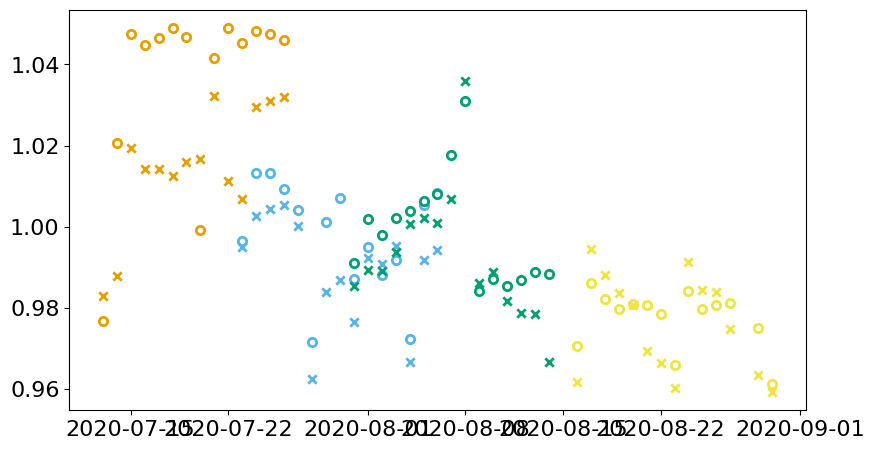

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9.5, 5.2), sharex=True, sharey=False)

for i_lck, lockdown in enumerate([locs_01, locs_02, locs_03, locs_04]):
    if i_lck > 0:
        prev_dates = dates_lockdown[i_lck-1]
    else:
        prev_dates =  dates_lockdown[i_lck] - pd.Timedelta(days=14) #dates_lockdown[i_lck-1]

    localities_left     = list(set(cases_bog_df.locality.unique()) - set(lockdown))
    int_mov_gr01_df     = int_mov_df[int_mov_df["start_poly_id"].isin(lockdown)]
    int_mov_not_gr01_df = int_mov_df[int_mov_df["start_poly_id"].isin(localities_left)]

    bog_g01_df          = int_mov_gr01_df[["date_time", "movement"]].groupby(['date_time']).mean().reset_index()
    bog_g01_df          = bog_g01_df[bog_g01_df["date_time"].isin(dates_lockdown[i_lck])]

    bog_prev_g01_df = int_mov_gr01_df[["date_time", "movement"]].groupby(['date_time']).mean().reset_index()
    bog_prev_g01_df = bog_prev_g01_df[bog_prev_g01_df["date_time"].isin(prev_dates)]
    ##
    bog_prev_g01_df["day_of_week"] = bog_prev_g01_df["date_time"].apply(lambda x: x.weekday())
    bog_prev_g01_df                = bog_prev_g01_df.groupby(['day_of_week']).mean().reset_index()
    bog_g01_df["day_of_week"]      = bog_g01_df["date_time"].apply(lambda x: x.weekday())
    bog_g01_df                     = pd.merge(bog_g01_df, bog_prev_g01_df[["day_of_week", "movement"]],
                                                                            on="day_of_week", how="outer")
    bog_g01_df["change_in_internal_movement"] = bog_g01_df["movement_x"] / bog_g01_df["movement_y"]
    bog_g01_df["group"] = i_lck+1

    if i_lck == 3:
        filtered = lowess(bog_g01_df["change_in_internal_movement"], range(len(bog_g01_df["date_time"])),
                                                                            is_sorted=True, frac=0.6, it=10)
        bog_g01_df["change_in_internal_movement_sm"] = bog_g01_df["change_in_internal_movement"]
        ax.scatter(x=bog_g01_df["date_time"], y=np.squeeze(filtered[:, 1]), ec=palette_guide[i_lck], fc="w", lw=2, alpha=1)
        locked_down_arr = np.squeeze(filtered[:, 1])

    elif i_lck==0:
        filtered = lowess(bog_g01_df["change_in_internal_movement"], range(len(bog_g01_df["date_time"])),
                                                                            is_sorted=True, frac=0.55, it=100)
        bog_g01_df["change_in_internal_movement_sm"] = bog_g01_df["change_in_internal_movement"]
        ax.scatter(x=bog_g01_df["date_time"], y=np.squeeze(filtered[:, 1]), ec=palette_guide[i_lck], fc="w", lw=2, alpha=1)
        locked_down_arr = np.squeeze(filtered[:, 1])

    else:
        ax.scatter(bog_g01_df["date_time"], bog_g01_df["change_in_internal_movement"], ec=palette_guide[i_lck], fc="w", lw=2, alpha=1)
        locked_down_arr = bog_g01_df["change_in_internal_movement"].values

    ####  not locked down

    bog_prev_g01_df = int_mov_not_gr01_df[["date_time", "movement"]].groupby(['date_time']).mean().reset_index()
    bog_prev_g01_df = bog_prev_g01_df[bog_prev_g01_df["date_time"].isin(prev_dates)]
    ##
    bog_prev_g01_df["day_of_week"] = bog_prev_g01_df["date_time"].apply(lambda x: x.weekday())
    bog_prev_g01_df                = bog_prev_g01_df.groupby(['day_of_week']).mean().reset_index()

    bog_g01_df                     = int_mov_not_gr01_df[["date_time", "movement"]].groupby(['date_time']).mean().reset_index()
    bog_g01_df                     = bog_g01_df[bog_g01_df["date_time"].isin(dates_lockdown[i_lck])]
    bog_g01_df["day_of_week"]      = bog_g01_df["date_time"].apply(lambda x: x.weekday())
    bog_g01_df                     = pd.merge(bog_g01_df, bog_prev_g01_df[["day_of_week", "movement"]],
                                                                            on="day_of_week", how="outer")
    bog_g01_df["change_in_internal_movement"] = bog_g01_df["movement_x"] / bog_g01_df["movement_y"]
    bog_g01_df["group"] = i_lck+1

    if i_lck == 3:
        filtered = lowess(bog_g01_df["change_in_internal_movement"], range(len(bog_g01_df["date_time"])),
                                                                            is_sorted=True, frac=0.6, it=10)
        bog_g01_df["change_in_internal_movement_sm"] = bog_g01_df["change_in_internal_movement"]
        ax.scatter(x=bog_g01_df["date_time"], y=np.squeeze(filtered[:, 1]), marker="x", fc=palette_guide[i_lck], lw=2, alpha=1, label="not restricted")
        not_locked_down_arr = np.squeeze(filtered[:, 1])

    else:
        ax.scatter(bog_g01_df["date_time"], bog_g01_df["change_in_internal_movement"],
                                            ec=palette_guide[i_lck], marker="x", fc=palette_guide[i_lck], lw=2, alpha=1)
        not_locked_down_arr = bog_g01_df["change_in_internal_movement"].values

    t_stat = stats.ttest_ind(locked_down_arr, not_locked_down_arr, equal_var=False)
    print("Lockdown group {}, t-stat: {:0.3f}, p-val: {:0.3f}, df: {:0.3f}".format(i_lck, t_stat.statistic, t_stat.pvalue, t_stat.df))



/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_84708/1272691852.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_lockedown_mob_df["day_of_week"] = pre_lockedown_mob_df["date_time"].apply(lambda x: x.weekday())
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_84708/1272691852.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_lockedown_mob_df["day_of_week"] = pre_lockedown_mob_df["date_time"].apply(lambda x: x.weekday())
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipy

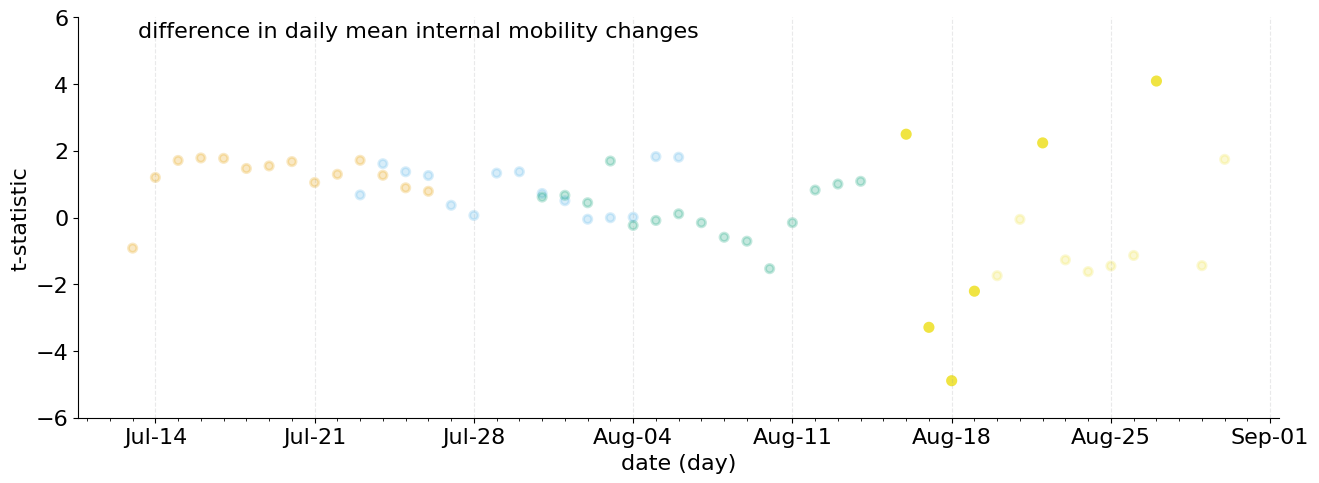

In [11]:
#fig, ax = plt.subplots(1, 1, figsize=(9.5, 5.2), sharex=True, sharey=False)

fig, ax = plt.subplots(1, 1, figsize=(15.5, 5.2), sharex=True, sharey=False)

for i_lck, lockdown in enumerate([locs_01, locs_02, locs_03, locs_04]):
    if i_lck > 0:
        prev_dates = dates_lockdown[i_lck-1]
    else:
        prev_dates =  dates_lockdown[i_lck] - pd.Timedelta(days=14) #dates_lockdown[i_lck-1]

    localities_left     = list(set(cases_bog_df.locality.unique()) - set(lockdown))

    int_mov_gr01_df     = int_mov_df[int_mov_df["start_poly_id"].isin(lockdown)]
    int_mov_not_gr01_df = int_mov_df[int_mov_df["start_poly_id"].isin(localities_left)]

    #bog_prev_g01_df = int_mov_gr01_df[["date_time", "movement"]].groupby(['date_time']).mean().reset_index()
    #bog_prev_g01_df = bog_prev_g01_df[bog_prev_g01_df["date_time"].isin(pre_dates_lock)]

    pre_lockedown_mob_df                = int_mov_gr01_df[int_mov_gr01_df["date_time"].isin(prev_dates)]#[["", "movement"]]
    pre_lockedown_mob_df["day_of_week"] = pre_lockedown_mob_df["date_time"].apply(lambda x: x.weekday())

    #.mean().reset_index()
    lockedown_mob_df                = int_mov_gr01_df[int_mov_gr01_df["date_time"].isin(dates_lockdown[i_lck])].groupby(["date_time", "start_poly_id"])[["movement"]].mean().reset_index()
    lockedown_mob_df["day_of_week"] = lockedown_mob_df["date_time"].apply(lambda x: x.weekday())

    merge_locked_int_df  = pd.merge(lockedown_mob_df, pre_lockedown_mob_df, on=["start_poly_id", "day_of_week"], suffixes=("_lockdown", "_pre_lockdown")).sort_values("date_time_lockdown")
    merge_locked_int_df  = merge_locked_int_df[["date_time_lockdown", "start_poly_id", "movement_lockdown", "movement_pre_lockdown"]]
    merge_locked_int_df["change_in_internal_movement"] = merge_locked_int_df["movement_lockdown"] / merge_locked_int_df["movement_pre_lockdown"]

    ####################

    pre_not_lockeddown_mob_df = int_mov_not_gr01_df[int_mov_not_gr01_df["date_time"].isin(prev_dates)].groupby(["date_time", "start_poly_id"])[["movement"]].mean().reset_index()
    pre_not_lockeddown_mob_df["day_of_week"] = pre_not_lockeddown_mob_df["date_time"].apply(lambda x: x.weekday())

    not_lockedown_mob_df      = int_mov_not_gr01_df[int_mov_not_gr01_df["date_time"].isin(dates_lockdown[i_lck])].groupby(["date_time", "start_poly_id"])[["movement"]].mean().reset_index()
    not_lockedown_mob_df["day_of_week"] = not_lockedown_mob_df["date_time"].apply(lambda x: x.weekday())

    merge_not_locked_int_df  = pd.merge(not_lockedown_mob_df, pre_not_lockeddown_mob_df, on=["start_poly_id", "day_of_week"], suffixes=("_not_lockdown", "_pre_lockdown")).sort_values("date_time_not_lockdown")
    merge_not_locked_int_df  = merge_not_locked_int_df[["date_time_not_lockdown", "start_poly_id", "movement_not_lockdown", "movement_pre_lockdown"]]
    merge_not_locked_int_df["change_in_internal_movement"] = merge_not_locked_int_df["movement_not_lockdown"] / merge_not_locked_int_df["movement_pre_lockdown"]

    t_stat_arr = []
    p_val_arr  = []
    for date_i in merge_locked_int_df["date_time_lockdown"].unique():

        locked_down_arr     = merge_locked_int_df[merge_locked_int_df.date_time_lockdown == date_i]["change_in_internal_movement"].values
        not_locked_down_arr = merge_not_locked_int_df[merge_not_locked_int_df.date_time_not_lockdown == date_i]["change_in_internal_movement"].values

        stat, p = stats.levene(locked_down_arr, not_locked_down_arr)
        #print(f"Levene test for equal variances: stat={stat}, p={p}")
        if p <= 0.05:
            equal_var = False
        else:
            equal_var = True

        t_stat     = stats.ttest_ind(np.sort(locked_down_arr), np.sort(not_locked_down_arr), equal_var=equal_var, trim=0.02)
        t_stat_arr.append(t_stat.statistic)
        p_val_arr.append(t_stat.pvalue)

    p_val_arr = np.array(p_val_arr)
    alphas    = np.ones_like(p_val_arr)*((p_val_arr <= 0.05) + 0.3) / 1.3

    ax.scatter(merge_locked_int_df["date_time_lockdown"].unique(), t_stat_arr,
                            label = "t-statistic", color=palette_guide[i_lck], lw=2,
                            alpha = alphas)

for axi in [ax]:
    axi.grid(axis='x', which="major", linestyle='--', alpha=0.2, color=palette_grays[1])
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    axi.tick_params(which='both', axis='x', labelrotation=0)
    axi.xaxis.set_major_locator(mdates.WeekdayLocator())
    axi.xaxis.set_minor_locator(mdates.DayLocator())
    axi.spines['right'].set_visible( False )
    axi.spines['top'].set_visible( False )

ax.set_ylabel("t-statistic")
ax.text(0.05, 0.95, "difference in daily mean internal mobility changes",
                    transform=ax.transAxes, alpha=1)
ax.set_ylim([-6, 6])
ax.set_xlabel("date (day)")

fig.savefig(os.path.join('figures',  'Fig1_R1_stats_internal_mobility_changes.png'), transparent=True, dpi=300, bbox_inches='tight')